## Import the necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Load and Explore the Data

In [2]:
rawdata = pd.read_csv("event_data.csv")

<IPython.core.display.Javascript object>

In [3]:
rawdata

,user_id,event_date,event_type,purchase_amount
0,c40e6a,2019-07-29 00:02:15,registration,NaN
1,a2b682,2019-07-29 00:04:46,registration,NaN
2,9ac888,2019-07-29 00:13:22,registration,NaN
3,93ff22,2019-07-29 00:16:47,registration,NaN
4,65ef85,2019-07-29 00:19:23,registration,NaN
...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN
79738,a84999,2019-09-01 23:57:50,simple_event,NaN
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN


<IPython.core.display.Javascript object>

Observations:
* 79742 observations with 28 attributes

In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79742 entries, 0 to 79741
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          79742 non-null  object 
 1   event_date       79742 non-null  object 
 2   event_type       79742 non-null  object 
 3   purchase_amount  6207 non-null   float64
dtypes: float64(1), object(3)
memory usage: 2.4+ MB


<IPython.core.display.Javascript object>

In [5]:
df = rawdata.copy()

<IPython.core.display.Javascript object>

In [6]:
df["event_type"].value_counts()

simple_event    63539
registration     9996
purchase         6207
Name: event_type, dtype: int64

<IPython.core.display.Javascript object>

In [7]:
registrations = df[df["event_type"] == "registration"].copy()
registrations.head()

,user_id,event_date,event_type,purchase_amount
0,c40e6a,2019-07-29 00:02:15,registration,NaN
1,a2b682,2019-07-29 00:04:46,registration,NaN
2,9ac888,2019-07-29 00:13:22,registration,NaN
3,93ff22,2019-07-29 00:16:47,registration,NaN
4,65ef85,2019-07-29 00:19:23,registration,NaN


<IPython.core.display.Javascript object>

## Task 2. Problem-solving
**Time for task 2: 40min** 

### 2. Highlight user cohorts based on the week of registration in the application. 
* The cohort identifier should be the week ordinal (for example, the week from July 29 to August 4
should have identifier 31).

In [8]:
# testing for week ordinal
import datetime

datetime.date(2019, 7, 29).isocalendar()[1]

31

<IPython.core.display.Javascript object>

In [9]:
registrations["Date"] = pd.to_datetime(registrations["event_date"])

<IPython.core.display.Javascript object>

In [10]:
registrations["Date"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [11]:
registrations["Registration_Cohort"] = registrations["Date"].dt.isocalendar().week
registrations.sample(5, random_state=4)

,user_id,event_date,event_type,purchase_amount,Date,Registration_Cohort
4089,d487cd,2019-08-03 17:37:05,registration,NaN,2019-08-03 17:37:05,31
65706,03e7e5,2019-08-28 12:50:53,registration,NaN,2019-08-28 12:50:53,35
49842,b1fda0,2019-08-23 09:28:16,registration,NaN,2019-08-23 09:28:16,34
56669,4037ba,2019-08-25 15:22:21,registration,NaN,2019-08-25 15:22:21,34
9279,b22c16,2019-08-07 05:06:08,registration,NaN,2019-08-07 05:06:08,32


<IPython.core.display.Javascript object>

Obervations:
* The column "Registration_Cohort" contains the Cohort of each unique user based on it's registration date

In [12]:
# registrations["Date"].dt.date

<IPython.core.display.Javascript object>

### 3. How many unique users in the cohort with ID 33?

There are 79742 user ids

There are 9996 unique users

There are 69746 duplicated entries of user id

In [13]:
df["Date"] = pd.to_datetime(df["event_date"])
df["Event_Cohort"] = df["Date"].dt.isocalendar().week

<IPython.core.display.Javascript object>

In [14]:
# 3. How many unique users in the cohort with ID 33?
unique_ID = len(set(df["user_id"].str.strip()))
print(f"There are {unique_ID} unique users")

There are 9996 unique users


<IPython.core.display.Javascript object>

In [15]:
a = df[["user_id", "Event_Cohort"]]
unique_users_Cohort_33 = a[a["Event_Cohort"] == 33].drop_duplicates(subset=["user_id"])
print(f"There are {unique_users_Cohort_33.shape[0]} unique users in the Cohort 33")

There are 5102 unique users in the Cohort 33


<IPython.core.display.Javascript object>

### 4. For each event, highlight the indicator lifetime - the weekly lifetime of the cohort. 
The lifetime indicator is calculated based on the serial number of the week in which the event
is committed, relative to the week of registration. For example, an event committed on
August 3 by a user from a cohort of registrants at 31 weeks will be committed on the zero
week of lifetime, and an event committed by the same user on August 5 will be committed
on the first week of lifetime).

In [16]:
reg_cohort = registrations[["user_id", "Registration_Cohort"]]

<IPython.core.display.Javascript object>

In [17]:
dataset_merged = pd.merge(
    left=df, right=reg_cohort, how="left", left_on="user_id", right_on="user_id",
)
print("Original Data", len(df))
print("Merged Data", len(dataset_merged))

Original Data 79742
Merged Data 79742


<IPython.core.display.Javascript object>

In [18]:
dataset_merged.sample(5, random_state=6)

,user_id,event_date,event_type,purchase_amount,Date,Event_Cohort,Registration_Cohort
36955,9a3e03,2019-08-18 23:10:02,simple_event,NaN,2019-08-18 23:10:02,33,32
70616,0288fb,2019-08-30 03:10:46,simple_event,NaN,2019-08-30 03:10:46,35,35
5573,1814c7,2019-08-04 20:47:07,simple_event,NaN,2019-08-04 20:47:07,31,31
15599,52b461,2019-08-10 11:48:30,simple_event,NaN,2019-08-10 11:48:30,32,32
43314,ca1868,2019-08-21 04:41:56,simple_event,NaN,2019-08-21 04:41:56,34,32


<IPython.core.display.Javascript object>

In [19]:
dataset_merged["Weekly_Lifetime_indicator"] = (
    dataset_merged["Event_Cohort"] - dataset_merged["Registration_Cohort"]
)

<IPython.core.display.Javascript object>

In [20]:
dataset_merged.sample(10, random_state=6)

,user_id,event_date,event_type,purchase_amount,Date,Event_Cohort,Registration_Cohort,Weekly_Lifetime_indicator
36955,9a3e03,2019-08-18 23:10:02,simple_event,NaN,2019-08-18 23:10:02,33,32,1
70616,0288fb,2019-08-30 03:10:46,simple_event,NaN,2019-08-30 03:10:46,35,35,0
5573,1814c7,2019-08-04 20:47:07,simple_event,NaN,2019-08-04 20:47:07,31,31,0
15599,52b461,2019-08-10 11:48:30,simple_event,NaN,2019-08-10 11:48:30,32,32,0
43314,ca1868,2019-08-21 04:41:56,simple_event,NaN,2019-08-21 04:41:56,34,32,2
72367,dc551a,2019-08-30 16:30:34,simple_event,NaN,2019-08-30 16:30:34,35,35,0
12826,4a0550,2019-08-09 03:40:04,simple_event,NaN,2019-08-09 03:40:04,32,31,1
30557,51aeed,2019-08-16 15:36:28,simple_event,NaN,2019-08-16 15:36:28,33,32,1
66787,f5b962,2019-08-28 21:30:42,simple_event,NaN,2019-08-28 21:30:42,35,33,2
20616,9909e6,2019-08-12 17:42:36,simple_event,NaN,2019-08-12 17:42:36,33,31,2


<IPython.core.display.Javascript object>

Obervatios:
* The column "Weekly_Lifetime_indicator" has the information of each event lifetime based on when that user registered

### 5. Build a summary table of changes in the Retention Rate for cohorts depending on lifetime.

In [21]:
# Counting daily active user from each chort
grouping = dataset_merged.groupby(["Registration_Cohort", "Weekly_Lifetime_indicator"])


# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping["user_id"].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()


# Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(
    index="Registration_Cohort", columns="Weekly_Lifetime_indicator", values="user_id"
)

# Printing top 5 rows of Dataframe
cohort_data.head()

,Registration_Cohort,Weekly_Lifetime_indicator,user_id
0,31,0,1975
1,31,1,1832
2,31,2,1243
3,31,3,705
4,31,4,297


<IPython.core.display.Javascript object>

In [22]:
print(cohort_counts.round(1))

Weekly_Lifetime_indicator       0       1       2      3      4
Registration_Cohort                                            
31                         1975.0  1832.0  1243.0  705.0  297.0
32                         1952.0  1814.0  1265.0  705.0    NaN
33                         2045.0  1890.0  1352.0    NaN    NaN
34                         1974.0  1834.0     NaN    NaN    NaN
35                         2050.0     NaN     NaN    NaN    NaN


<IPython.core.display.Javascript object>

Calculate business metrics: Retention rate
* The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.

In the this section, we will calculate retention count for each cohort Month paired with cohort Index

Now that we have count of retained customer for each cohortMonth and cohortIndex. We will calculate retention rate for each Cohort.

We will create a pivot table for this purpose.

In [23]:
"""
Select the first column and store it to cohort_sizes as size of cohort === no. active customer in first day
We will store the 1st column as Cohort size i.e total Number of Customers in that Cohort
"""

cohort_sizes = cohort_counts.iloc[:, 0]

"""
We will divide the values in other columns with Cohort Size in order to calculate the retention rate i.e Number of Customers in Each Cohort Index
"""

retention = cohort_counts.divide(cohort_sizes, axis=0)

<IPython.core.display.Javascript object>

In [24]:
"""
this matrix has 2 axes: 
x - cohort date (week number); y - cohort maturity (in weeks)
every cell is a unique count of customer for the x and y

if a customer's last order was in period 2,
they were active in period 0, 1 as well
same for other periods

"""

# Coverting the retention rate into percentage and Rounding off.
retention.round(4) * 100

Weekly_Lifetime_indicator,0,1,2,3,4
Registration_Cohort,,,,,
31,100.0,92.76,62.94,35.70,15.04
32,100.0,92.93,64.81,36.12,NaN
33,100.0,92.42,66.11,NaN,NaN
34,100.0,92.91,NaN,NaN,NaN
35,100.0,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

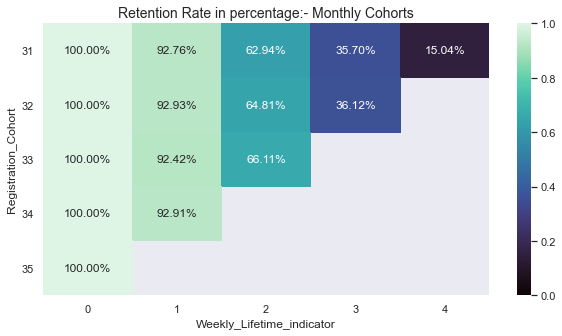

<IPython.core.display.Javascript object>

In [25]:
# Initialize the figure
plt.figure(figsize=(10, 5))

# Adding a title
plt.title("Retention Rate in percentage:- Monthly Cohorts", fontsize=14)

# Creating the seaborn based heatmap
sns.heatmap(retention, annot=True, fmt=".2%", cmap="mako", vmin=0.0, vmax=1)
plt.ylabel("Registration_Cohort")
plt.xlabel("Weekly_Lifetime_indicator")
plt.yticks(rotation="360")
plt.show()

In [26]:
retention[3][1:2]

Registration_Cohort
32    0.361168
Name: 3, dtype: float64

<IPython.core.display.Javascript object>

## 6. What is the 3 week retention rate for a cohort with ID 32? 
Give the answer in percent, rounded to 2 decimal places, inclusive.

In [27]:
print(
    f"The 3 week retention rate for a cohort with ID 32 is: {np.round(float(retention[3][1:2]*100), 2)}%"
)

The 3 week retention rate for a cohort with ID 32 is: 36.12%


<IPython.core.display.Javascript object>

## 7. Build a summary table of changes in the indicator ARPPU 
(Average Revenue Per Paying User) for cohorts depending on lifetime.

In [28]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = dataset_merged.groupby(["Registration_Cohort", "Weekly_Lifetime_indicator"])

# Calculate the standard  average cost of the standard_cost column
cohort_data = grouping["purchase_amount"].mean()

# Reset the index of cohort_data before pivot
cohort_data = cohort_data.reset_index()

# Create a pivot
average_order = cohort_data.pivot(
    index="Registration_Cohort",
    columns="Weekly_Lifetime_indicator",
    values="purchase_amount",
)

average_revenue = average_order.round(1)

<IPython.core.display.Javascript object>

In [29]:
average_revenue.head()

Weekly_Lifetime_indicator,0,1,2,3,4
Registration_Cohort,,,,,
31,28.1,29.5,30.5,29.1,30.5
32,30.2,29.8,29.9,29.5,NaN
33,30.7,30.5,29.2,NaN,NaN
34,30.8,30.9,NaN,NaN,NaN
35,30.7,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

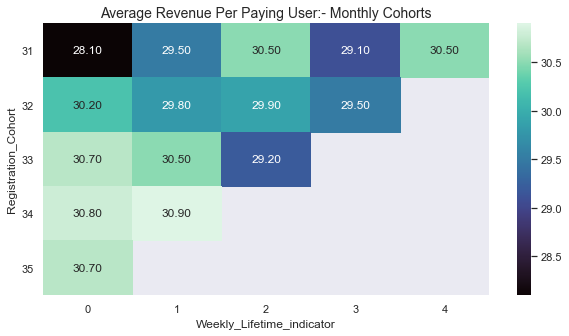

<IPython.core.display.Javascript object>

In [30]:
# Initialize the figure
plt.figure(figsize=(10, 5))

# Adding a title
plt.title("Average Revenue Per Paying User:- Monthly Cohorts", fontsize=14)

# Creating the seaborn based heatmap
sns.heatmap(average_revenue, annot=True, fmt=".2f", cmap="mako")
plt.ylabel("Registration_Cohort")
plt.xlabel("Weekly_Lifetime_indicator")
plt.yticks(rotation="360")
plt.show()

In [31]:
average_revenue[3][0:1]

Registration_Cohort
31    29.1
Name: 3, dtype: float64

<IPython.core.display.Javascript object>

In [32]:
average_revenue

Weekly_Lifetime_indicator,0,1,2,3,4
Registration_Cohort,,,,,
31,28.1,29.5,30.5,29.1,30.5
32,30.2,29.8,29.9,29.5,NaN
33,30.7,30.5,29.2,NaN,NaN
34,30.8,30.9,NaN,NaN,NaN
35,30.7,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

### 8. What is the 3-week ARPPU of a cohort with ID 31? 
Give the answer with a floating point number, rounded to 2 decimal places, inclusive.


In [33]:
print(
    f"The 3-week ARPPU of a cohort with ID 31 is {np.round(float(average_revenue[3][0:1]), 2)}"
)

The 3-week ARPPU of a cohort with ID 31 is 29.1


<IPython.core.display.Javascript object>

### 9. What is the median time between user registration and first purchase? 

Give the answer 
in seconds (!) As an integer.

In [34]:
all_purchases = dataset_merged[dataset_merged["event_type"] == "purchase"]
all_purchases.shape[0]

6207

<IPython.core.display.Javascript object>

In [35]:
all_purchases["user_id"].duplicated().sum()

1924

<IPython.core.display.Javascript object>

In [36]:
unique_purchases = all_purchases.drop_duplicates(subset="user_id")
unique_purchases.shape[0]

4283

<IPython.core.display.Javascript object>

In [37]:
unique_purchases["time_before_first_purchase"] = (
    unique_purchases["Event_Cohort"] - unique_purchases["Registration_Cohort"]
)

<IPython.core.display.Javascript object>

In [38]:
time_in_seconds = int(unique_purchases["time_before_first_purchase"].median() * 604800)
print(
    f"The median time between user registration and first purchase is {time_in_seconds} seconds"
)

The median time between user registration and first purchase is 604800 seconds


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time_before_first_purchase', ylabel='Density'>

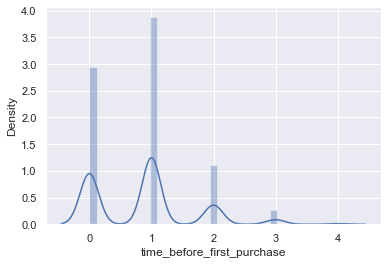

<IPython.core.display.Javascript object>

In [39]:
sns.distplot(unique_purchases["time_before_first_purchase"])

### **Task 3. Answering student questions**
    
How would you answer the student's question below? Your task is to get your message across in such a way that a beginner can understand your explanation. You can do this any way you want (pictures, GIFs, metaphors, anything) so long as it makes your explanation clear.

Answer the question: "What is the difference between DataFrame and Series?"
Indicate how much time you spent completing this task.

* Series is a **type** of list in pandas which can take **integer values, string values, double values and more. ...** 

* Series can only contain single list with index

* Dataframe can be made of more than one series or **we can say that a dataframe is a collection of series that can be used to analyse the data.**

Useful Resources:

Visual Representation: https://www.datasciencemadesimple.com/create-series-in-python-pandas/

Time to complete task: 10 min

### Task 4

You are given two random variables X and Y.

* E(X) = 0.5, Var(X) = 2 

* E(Y) = 7, Var(Y) = 3.5 

* cov (X, Y) = -0.8 

Find the variance of the random variable Z = 2X - 3Y

**Time to complete task: 10 min**

In [40]:
Var_z = 4 * (2) + 2 * (2) * (-3) * (-0.8) + 9 * (3.5)
print(f"The variance of z = Var(2X-3Y) is: {Var_z}")

The variance of z = Var(2X-3Y) is: 49.1


<IPython.core.display.Javascript object>

### **Task 5.**
    
Omer trained a linear regression model and tested its performance on a test sample of 500
objects. On 400 of those, the model returned a prediction higher than expected by 0.5, and on
the remaining 100, the model returned a prediction lower than expected by 0.7.

* What is the MSE for his model?
    
* Limor claims that the linear regression model wasn't trained correctly, and we can do improve it by changing all the answers by a constant value. 

* What will be her MSE?

You can assume that Limor found the smallest error under her constraints.
Return two values - Omer's and Limor's MSE.

**time for task 5: 30 mins**

In [41]:
# What is the MSE for his model?
omer_mse = (np.square(-400 * 0.5) / 400 + np.square(100 * 0.7) / 100) / 500
print(f"The mean squared error for Omer's model is: {omer_mse}")

The mean squared error for Omer's model is: 0.298


<IPython.core.display.Javascript object>

If Limor changes all predicted values of the model by a constant "c",
We know that Residuals = Actual - Predicted

* Limor's Residuals will be Residuals = Actual - (Predicted + c)

* Residuals = (Actual - Predicted) - c
    * For the first 400 points: Residuals = -0.5 - c
    * For the las 100 points: Residuals = 0.7 - c
 
Limor's mse will change by : **c^2 - 0.52 c + 0.298**

**Limor's model will not improve Omar's model**

Resources : https://www.wolframalpha.com/input?i=%28%28400*%28-0.5%2Ba%29%29%5E2%2F400+%2B+%28100*%280.7%2Ba%29%29%5E2%2F100%29+%2F+500

## Verifying mse after changing predicted values by a constant c

In [42]:
# Let c be the constant that Limor uses to correct predicted values
c = 5  # you can choose the c you want!!!
## if you set c = 0 you will get Omer's MSE

<IPython.core.display.Javascript object>

In [43]:
## Omer's Model:
a = [5] * 500
df_pred = pd.DataFrame()
df_pred["Actual values"] = a
df_pred["Fitted values"] = a

for i in df_pred["Actual values"].index:
    if i < 400:
        df_pred["Fitted values"].loc[i] = df_pred["Actual values"].loc[i] + 0.5 - c
    else:
        df_pred["Fitted values"].loc[i] = df_pred["Actual values"].loc[i] - 0.7 - c

df_pred["Residuals"] = df_pred["Actual values"] - df_pred["Fitted values"]
df_pred["Residuals"].value_counts()

4.5    400
5.7    100
Name: Residuals, dtype: int64

<IPython.core.display.Javascript object>

In [44]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# let's check the MSE on the train data
mse1 = mean_squared_error(df_pred["Actual values"], df_pred["Fitted values"])
mse1

22.698

<IPython.core.display.Javascript object>

In [45]:
c ** 2 - 0.52 * c + 0.298

22.697999999999997

<IPython.core.display.Javascript object>

### We can see that Limor's MSE changes by : c^2 - 0.52c +0.298
### When c = 0 we get Omar's MSE of 0.298, try it out! 
### just set the value of c = 0

##### Keep Learning !!!